In [3]:
import os
import csv
import pandas as pd 

file = "checkouts_5yr.csv"

publishers = pd.read_csv(file)



In [4]:
publishers["MaterialType"].value_counts()

BOOK         3458902
EBOOK        1560880
AUDIOBOOK     602173
Name: MaterialType, dtype: int64

In [5]:
publisher = publishers.groupby('Publisher')

In [6]:
publishers["Publisher"].value_counts()

Random House, Inc.                                                                                                             330147
Penguin Group (USA), Inc.                                                                                                      270692
HarperCollins Publishers Inc.                                                                                                  237505
Books on Tape                                                                                                                  147939
Blackstone Audio, Inc.                                                                                                         137253
Macmillan Publishers                                                                                                           124034
Simon & Schuster, Inc.                                                                                                         105002
Hachette Digital, Inc.                                        

In [7]:
#publisher_chart= publisher.plot(kind="bar", title = "Most Checked Out Publishers")

In [18]:
pub_standardize = publishers.replace(
   {"Random House,": "Random House, Inc."})
pub_standardize["Publisher"].value_counts()

Random House, Inc.                                                                                                             378375
Penguin Group (USA), Inc.                                                                                                      270692
HarperCollins Publishers Inc.                                                                                                  237505
Books on Tape                                                                                                                  147939
Blackstone Audio, Inc.                                                                                                         137253
Macmillan Publishers                                                                                                           124034
Simon & Schuster, Inc.                                                                                                         105002
Hachette Digital, Inc.                                        

Random House, Inc.               378375
Penguin Group (USA), Inc.        270692
HarperCollins Publishers Inc.    237505
Books on Tape                    147939
Blackstone Audio, Inc.           137253
Macmillan Publishers             124034
Simon & Schuster, Inc.           105002
Hachette Digital, Inc.            95845
Tantor Media, Inc                 48401
Thorndike Press,                  41173
Name: Publisher, dtype: int64


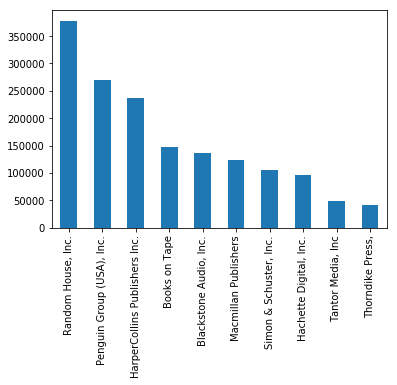

In [28]:
publisher_top10 = pub_standardize["Publisher"].value_counts()
publisher_top = publisher_top10.head(10)

#Use below to only add rest of the publishers that are not part of top 10
#if len(publisher_top10) > 10:
    #publisher_top['remaining {0} items'.format(len(publisher_top10) - 10)] = sum(publisher_top10[10:])
    
    
publisher_top.plot(kind='bar')

print(publisher_top)